<a href="https://colab.research.google.com/github/kiryu-3/prosa/blob/main/Python/Python_Stats/Stats_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第3章 正規分布と標準化

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm

## 正規分布
第2章で何度か登場した**正規分布**は、最もよく使われる分布です。  
自然界の多くでよく見られます。（例：動物の身長や体重）



平均$μ$と分散$σ^2$でその形状が決まります。  
$$
X:N(μ,σ^2)
$$
この表記は「変数$X$は、平均$μ$で分散が$σ^2$の正規分布をする」ことを表します。

正規分布は次の図のように左右対称の形をしており、  
横軸は**確率変数**を、縦軸はそのときの**確率密度**を表します。  
（この形は釣鐘型であることから、**Bell shape**)とも呼ばれます）

$μ$は中央にあります。  


平均$μ$が大きければ右へ、小さければ左へ動き、  
標準偏差$σ$が大きければ平たく広くなり、小さければ高く狭くなります。

正規分布の確率密度変数は次の式で表されます。  

$$
f(x) =\frac{1}{\sqrt{2\pi}σ}e^{-\frac{1}{2}(\frac{x-μ}{σ})^2}
$$

実際はこの複雑な式を用いることはなく、**統計数値表**を用いて簡単に求めることが多いです。

### 標準化
平均0、分散1の正規分布を**標準正規分布**といいます。  
ひとまず描画してみましょう。

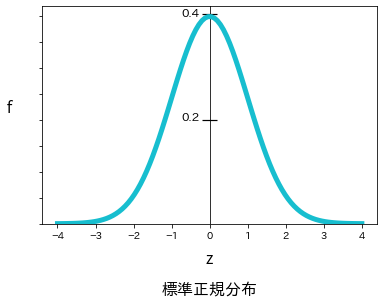

In [2]:
# 期待値・標準偏差を指定
mu = 0
sigma = 1

# 等差数列を生成
X = np.linspace(-4, 4, 100)

# pdfで確率密度関数を生成
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)  # 期待値=0, 標準偏差=1
# 確率密度を取得
norm_pdf_max = np.max(norm_pdf)  # 確率密度の最大値

# グラフ描画
plt.plot(X, norm_pdf, lw=5, color="tab:cyan")

# 垂直線
plt.vlines(0, 0, norm_pdf_max+0.05, color="black", lw=0.8)
plt.hlines(0.2, -0.2, 0.2, color="black", lw=1.2)  # 水平線
plt.hlines(0.403, -0.2, 0.2, color="black", lw=1.2)  # 水平線

# 軸目盛
#plt.xticks(color="None")  # x軸目盛を消去
plt.yticks(color="None")  # y軸目盛を消去
plt.ylim(0, norm_pdf_max + 0.02)  # y軸目盛範囲を指定

# テキストを配置
plt.text(-0.75, 0.2, '0.2', fontsize = 12) # 0.2
plt.text(-0.75, 0.4, '0.4', fontsize = 12) # 0.4


plt.xlabel("z",labelpad=10,fontsize = 16)
plt.ylabel("f",fontsize = 16 , rotation="horizontal")
plt.title("標準正規分布", x=0.5, y=-0.35, fontsize = 16)

plt.show()

0を中心に左右対称のグラフとなります。

このように、平均を0、分散を1にすることを**標準化**といいます。  
次の式で表されます。$x$が変数です。

$$
z=\frac{x-μ}{σ}
$$

この計算を通して得られた値を**$z$得点**といいます。

標準化をすることで、**「ある値が分布の中でどれくらいの位置にあるのか」**という尺度で  
複数のデータ群を比較することができます。

実際に手計算を行う際は、データを標準化した後に**標準正規分布表**を用いることで、確率を求めることができます。  
下には**上側確率**（ある値より大きくなる確率）の表があります。


### 標準正規分布表


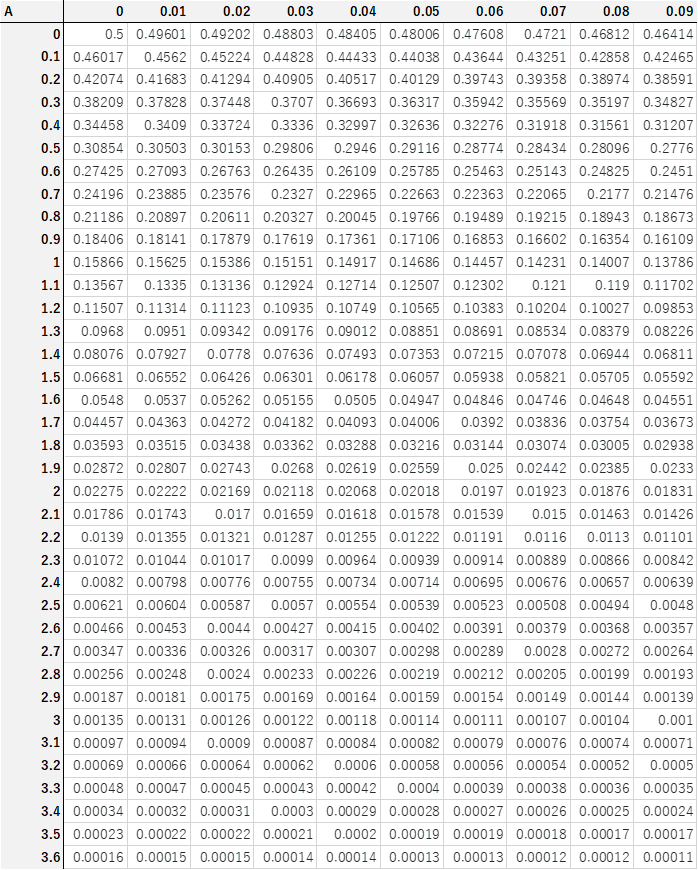

### 標準正規分布表の使い方

＜例題＞  
あるクラスのテスト結果は平均72.8点、標準偏差10点の正規分布に従っています。  
この時、60点から80点の人は何%いるでしょうか。

①「80点」を標準化$$\frac{80-72.8}{10}=0.72$$ 

②**「小数点第1位以上」**と**「小数点第2位以下」**に分ける  
→「0.72」を「0.7」と「0.02」に分ける  

③標準正規分布表の内、「小数点第1位以上」は**左端**の行を、「小数点第2位以下」は**上端**の列を見る  
→左端の「0.7」の行と「0.02」の列を見る 

④行と列が重なる部分は「0.23576」  
→ $P(z≧0.72)=0.23576$  

⑤80点以上の人は約23.6%いるということが分かる

---------------------------------------------


①「60点」を標準化$$\frac{60-72.8}{10}=-1.28$$ 

②標準正規分布表には負の値は存在しない。  
　そのため、負の値を正の値として考える

③**「小数点第1位以上」**と**「小数点第2位以下」**に分ける  
→「1.28」を「1.2」と「0.08」に分ける  

④標準正規分布表の内、「小数点第1位以上」は**左端**の行を、「小数点第2位以下」は**上端**の列を見る  
→左端の「1.2」の行と「0.08」の列を見る 

⑤行と列が重なる部分は「0.10027」  
→ $P(z≧1.28)=0.10027$  

⑥標準正規分布は$Z=0$に対して左右対称である。  
そのため、$P(z≧1.28)=P(z≦-1.28)$

⑦$P(z≧-1.28)=1-P(z≦-1.28)=0.89973$  
　60点以上の人は約90.0%いるということが分かる

---------------------------------------------

$P(-1.28≦z≦0.72)=P(z≧-1.28)-P(z≧0.72)=0.66397$  
60点以上80点以下の人は約66.4%いるということが分かる

### 演習


#### Question1
[こちら](https://bit.ly/3t0RrJb)の演習問題を解いてみましょう。

##### Question1-1

In [3]:
norm.isf(q=0.1)  # 上側確率から横軸zの値を求める

1.2815515655446004

今回は$z$の値が1.28と1.29の中間になりました。  
逆にこの値から確率を求めるときは、2つの確率の中間を取ることが多いです。

In [4]:
Px=(norm.sf(x=1.28)+norm.sf(x=1.29))/2  # z=1.28とz=1.29の上側確率の中間値を求める
print("P(z≦{}) = {}".format(norm.isf(q=0.1),Px))  # 手計算の時はこっち  
print("P(z≦{}) = {}".format(norm.isf(q=0.1),
                             norm.sf(x=norm.isf(q=0.1))))  # 厳密解

P(z≦1.2815515655446004) = 0.09939894850209496
P(z≦1.2815515655446004) = 0.10000000000000009


だいたい0.1になることが確認できるでしょう。  
Pythonで$z$の値が中間値を取った場合はそのまま指定するだけでOKになりますが、一応補足でした。

#### Question2
続いて[こちら](https://bit.ly/3E4N3zp)の演習問題を解いてみましょう。

##### Question2-1


In [5]:
print("P(x≦172) = P(z≦0) = {}".format(norm.sf(x=0)))  # 横軸から上側確率を求める

P(x≦172) = P(z≦0) = 0.5


##### Question2-2

In [6]:
print("P(166.5≦x≦177.5) = P(-1≦z≦1)\n = 2P(0≦z≦1)\n = 2(P(z≧0) - P(z≧1))\n = {}".
      format(2*(norm.sf(x=0)-norm.sf(x=1))))

P(166.5≦x≦177.5) = P(-1≦z≦1)
 = 2P(0≦z≦1)
 = 2(P(z≧0) - P(z≧1))
 = 0.6826894921370859


##### Question2-3

In [7]:
Z = (180-172)/5.5    # 標準化
print("P(x≧180) = P(z≧{}) = {}".format(Z,norm.sf(x=Z)))
print("180cm以上の高身長の男性は、全体の{}%しかいない".format(100*norm.sf(x=Z)))

P(x≧180) = P(z≧1.4545454545454546) = 0.07289757047598801
180cm以上の高身長の男性は、全体の7.289757047598801%しかいない


#### Question3
続いて[こちら](https://bit.ly/3fw6FTC)の演習問題を解いてみましょう。

##### Question3-1

In [8]:
Z = (79-85)/4  # 標準化
print("P(x≦79) = P(z≦{})\n = P(z≧{})\n = {}".format(Z,-Z,norm.sf(x=-Z)))
print("A君の下には{}%しかいない".format(100*norm.sf(x=-Z)))

P(x≦79) = P(z≦-1.5)
 = P(z≧1.5)
 = 0.06680720126885807
A君の下には6.680720126885807%しかいない


##### Question3-2

In [9]:
Z = norm.isf(q=1-0.95)  # 上位5%となるz軸の座標
print("(82-x)/10 = {}".format(Z))
print("xを求めると、x={}点≒66点".format(82-1.64*10))

(82-x)/10 = 1.6448536269514722
xを求めると、x=65.6点≒66点


### 偏差値
派生形として**偏差値**があります。  
平均50、標準偏差10に標準化した値です。次の式で表されます。

$$
Y=10×\frac{x-μ}{σ}+50
$$

先ほどの演習の最後の問題の、A君の英語と数学の偏差値を求めてみましょう。

In [10]:
print("英語の偏差値 = 10×(79-85)/4+50 = 10×(-1.5)+50 = {}".format(10*(-1.5)+50))
print("数学の偏差値 = 10×(66-82)/10×50 = 10×(1.64)+50 = {}".format(10*(1.64)+50))

英語の偏差値 = 10×(79-85)/4+50 = 10×(-1.5)+50 = 35.0
数学の偏差値 = 10×(66-82)/10×50 = 10×(1.64)+50 = 66.4


第3章は終了です。お疲れさまでしたー

## 補足1 Pythonと標準化
Pythonによる標準化は統計の分野ではあまり出番がありませんが、現場では使う機会が多いようです。  

[こちら](https://bit.ly/3zTlExy)のデータについて、標準化しようと思います。

In [11]:
# dictionaryからDataFrameを作る

data = {
    "標本A" : [165.6,151.1,149.7,148.4,159.0,163.6,162.9,150.8,148.4,153.7],
    "標本B" : [157.0,151.1,153.2,154.4,161.9,153.6,163.8,159.5,149.3,152.7]
}

df = pd.DataFrame(data)
df

,標本A,標本B
0,165.6,157.0
1,151.1,151.1
2,149.7,153.2
3,148.4,154.4
4,159.0,161.9
5,163.6,153.6
6,162.9,163.8
7,150.8,159.5
8,148.4,149.3
9,153.7,152.7


DataFrameを作ったので標準化してみましょう。

In [12]:
from sklearn.preprocessing import StandardScaler  # 標準化する際に必要

scaler = StandardScaler()    # インスタンス化
# カラムを1つだけ指定する場合は少し複雑
scaled = scaler.fit_transform(df['標本A'].values.reshape(-1, 1))  
df['標本A'] = scaled
df

,標本A,標本B
0,1.598742,157.0
1,-0.656293,151.1
2,-0.874021,153.2
3,-1.076196,154.4
4,0.572312,161.9
5,1.287703,153.6
6,1.178839,163.8
7,-0.702949,159.5
8,-1.076196,149.3
9,-0.251942,152.7


In [13]:
df = pd.DataFrame(data)

# カラムを2つ指定する場合は[]の数に注意
scaled = scaler.fit_transform(df[["標本A","標本B"]])
df[["標本A","標本B"]] = scaled
df

,標本A,標本B
0,1.598742,0.299170
1,-0.656293,-1.008314
2,-0.874021,-0.542938
3,-1.076196,-0.277009
4,0.572312,1.385047
5,1.287703,-0.454295
6,1.178839,1.806101
7,-0.702949,0.853189
8,-1.076196,-1.407208
9,-0.251942,-0.653742


## 補足2 Pythonと乱数と正規分布


**`np.random.randn()`**とすると、標準正規分布からランダムな値を取得できます。

In [14]:
np.random.randn()    # 0に近づくにつれて取得する確率が高くなる

1.0472704961717256

In [15]:
np.random.randn(5,5)

array([[ 0.12917251,  0.29610638, -0.22968408, -0.39075212, -0.49261663],
       [ 1.70154507,  0.66492582,  0.46568693, -0.44809275, -0.8806179 ],
       [-0.4228124 ,  0.25841838, -1.30603634,  0.50760158, -0.64180367],
       [-0.49622227,  0.74424134, -1.94686336,  0.80604027, -1.39163658],
       [-0.82802689,  0.57393002, -0.6248574 , -1.37865759, -0.83654129]])

**`np.random.normal(loc,scale)`**とすると、任意の正規分布からランダムな値を取得できます。  
平均と標準偏差を指定します。

In [16]:
np.random.normal(50,10)  # 偏差値の正規分布からランダム値取得

59.064331472224666

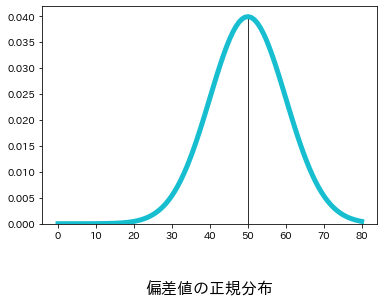

In [17]:
# 期待値・標準偏差を指定
mu = 50
sigma = 10

# 等差数列を生成
X = np.linspace(0, 80, 100)

# pdfで確率密度関数を生成
norm_pdf = stats.norm.pdf(x=X, loc=mu, scale=sigma)  # 期待値=0, 標準偏差=1
# 確率密度を取得
norm_pdf_max = np.max(norm_pdf)  # 確率密度の最大値

# グラフ描画
plt.plot(X, norm_pdf, lw=5, color="tab:cyan")

# 垂直線
plt.vlines(50, 0, norm_pdf_max, color="black", lw=0.8)
plt.hlines(0.2, -0.2, 0.2, color="black", lw=1.2)  # 水平線
plt.hlines(0.403, -0.2, 0.2, color="black", lw=1.2)  # 水平線

# 軸目盛
# plt.xticks(color="None")  # x軸目盛を消去
# plt.yticks(color="None")  # y軸目盛を消去
plt.ylim(0, norm_pdf_max + 0.002)  # y軸目盛範囲を指定

# テキストを配置
# plt.text(-0.75, 0.2, '0.2', fontsize = 12)  # 0.2
# plt.text(-0.75, 0.4, '0.4', fontsize = 12)  # 0.4


# plt.xlabel("z",labelpad=10,fontsize = 16)
# plt.ylabel("f",fontsize = 16 , rotation="horizontal")
plt.title("偏差値の正規分布", x=0.5, y=-0.35, fontsize = 16)

plt.show()